## This is the notebook used to train our ML model

Also model training, evaluation and hyperparamter optimization was done using Azure ML studio

For Azure

Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from azureml.core import Dataset
from azureml.core import Workspace
from azureml.data.datapath import DataPath

Importing Data

In [2]:


subscription_id = '3aacda10-fa6a-48ab-8d1b-c2a8cc5feb76'
resource_group = 'Hackathon'
workspace_name = 'Hackathon'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='csv_building_structure1.csv')
df = dataset.to_pandas_dataframe()
df.head()


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


For local

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick
import pickle

Configuring Pandas

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
df = pd.read_csv("csv_building_structure.csv")
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


Data Cleaning

In [5]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

Cleaning features for nan values

In [23]:
df.dropna(inplace=True)
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [24]:

# columns with numeric values | no need to encode
numeric = ['building_id','district_id','vdcmun_id','ward_id','count_floors_pre_eq','count_floors_post_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered']
# category can either be nominal or ordinal 
cat_ordinal=["land_surface_condition","position","damage_grade","technical_solution_proposed","condition_post_eq"]
cat_nominal=["foundation_type","roof_type","ground_floor_type","other_floor_type","plan_configuration"]

In [25]:
# getting each values for foundation_type 
nominal_categories = {}
for nom in cat_nominal:
    nominal_categories[f'{nom}s']=list(df[nom].unique())
nominal_categories


{'foundation_types': ['Other',
  'Mud mortar-Stone/Brick',
  'Cement-Stone/Brick',
  'Bamboo/Timber',
  'RC'],
 'roof_types': ['Bamboo/Timber-Light roof',
  'Bamboo/Timber-Heavy roof',
  'RCC/RB/RBC'],
 'ground_floor_types': ['Mud', 'Brick/Stone', 'RC', 'Timber', 'Other'],
 'other_floor_types': ['Not applicable',
  'TImber/Bamboo-Mud',
  'Timber-Planck',
  'RCC/RB/RBC'],
 'plan_configurations': ['Rectangular',
  'L-shape',
  'Square',
  'T-shape',
  'Multi-projected',
  'H-shape',
  'U-shape',
  'Others',
  'E-shape',
  'Building with Central Courtyard']}

In [14]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [26]:
def checkOrdinal(df):
    for cat in cat_ordinal:
        print(f'-----------{cat}------------------')
        print(df[cat].value_counts())

checkOrdinal(df)

-----------land_surface_condition------------------
Flat              631663
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64
-----------position------------------
Not attached       604443
Attached-1 side    129431
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64
-----------damage_grade------------------
Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64
-----------technical_solution_proposed------------------
Reconstruction    470219
Major repair      129415
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64
-----------condition_post_eq------------------
Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123843
Damaged-Repaired and used                  107791
Damaged-Rubble clear                      

Variable Encoding

In [27]:

#For variable encoding
from sklearn.preprocessing import LabelEncoder 

df[cat_ordinal] = df[cat_ordinal].apply(LabelEncoder().fit_transform)
df = pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)

# checkOrdinal(df)

In [28]:
# Label Encoded cols
land_surface_conditions = ['Flat','Moderate slope','Steep slope']
positions = ['Attached-1 side','Attached-2 side','Attached-3 side','Not attached']
damage_grades = ['Grade 1','Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
technical_solutions_proposed = ['Major repair','Minor repair','No need','Reconstruction']
conditions_post_eq = ['Covered by landslide','Damage-Not used','Damage-Repaired and used','Damage-Rubble Clear-New building built','Damage-Rubble clear','Damage-Rubble unclear','Damage-Used in risk','Not damaged']


Feature Engineering

In [47]:
df['net_floors'] = df.count_floors_pre_eq - df.count_floors_post_eq
df['net_height'] = df.height_ft_pre_eq - df.height_ft_post_eq

In [48]:
df['net_floors'] = df['net_floors'].apply(lambda floor: 0 if floor <= 0 else floor)
# df['net_floors'].value_counts()

In [49]:
df['net_height'] = df['net_height'].apply(lambda floor: 0 if floor <= 0 else floor)
# df['net_height'].value_counts()

Feature Selection

In [50]:
# Damage grade is the required target variable
y = df["damage_grade"]
# Currently considering all other columns as features
X = df.drop("damage_grade",axis=1)
from sklearn.model_selection import train_test_split
random_seed=0
# splitting data to 75-25 for train-test
test_ratio=0.25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_ratio,random_state=random_seed,stratify=y)

In [51]:
# Visualise proportions on train and test
pd.merge(y_train.reset_index(name="damage_grade").damage_grade.value_counts(normalize = True).reset_index(name="train"), y_test.reset_index(name="damage_grade").damage_grade.value_counts(normalize = True).reset_index(name="test"),on = "index",how = "left")

,index,train,test
0,4,0.361852,0.361855
1,3,0.241236,0.241235
2,2,0.178996,0.178996
3,1,0.114497,0.114495
4,0,0.103419,0.103420


In [24]:
# to find correlation between features
corr = X_train.corrwith(y,axis=0)
np.abs(corr).sort_values(ascending=False)

net_floors                                            0.709071
net_height                                            0.695974
height_ft_post_eq                                     0.635452
technical_solution_proposed                           0.626693
count_floors_post_eq                                  0.610946
has_superstructure_mud_mortar_stone                   0.480013
foundation_type_Mud mortar-Stone/Brick                0.445402
ground_floor_type_RC                                  0.409010
roof_type_RCC/RB/RBC                                  0.358221
has_superstructure_cement_mortar_brick                0.349806
foundation_type_RC                                    0.319610
ground_floor_type_Mud                                 0.295357
other_floor_type_RCC/RB/RBC                           0.286764
other_floor_type_TImber/Bamboo-Mud                    0.251899
foundation_type_Bamboo/Timber                         0.243242
has_superstructure_rc_engineered                      0

Feature Scaling

In [33]:
scaling_features = ['count_floors_pre_eq','count_floors_post_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq','height_ft_pre_eq','height_ft_post_eq','count_floors_pre_eq','count_floors_post_eq']
X_test[scaling_features].head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,height_ft_pre_eq,height_ft_post_eq,count_floors_pre_eq,count_floors_post_eq
471495,3,3,36,265,21,21,21,21,3,3
342228,4,0,42,420,28,0,28,0,4,0
138301,2,2,10,180,18,18,18,18,2,2
649374,2,2,10,240,12,12,12,12,2,2
214414,3,3,10,527,18,18,18,18,3,3


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[scaling_features] = scaler.fit_transform(X_train[scaling_features])
X_test[scaling_features] = scaler.transform(X_test[scaling_features])
X_train.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,net_floors,net_height
179586,220804000641,22,2202,220208,-0.133949,-1.177419,-0.066759,-0.448370,-0.554125,-1.151153,0,0,0,1,0,0,0,0,0,0,0,0,0,5,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,13
11173,121509000231,12,1204,120407,-0.133949,0.703864,-0.250987,-0.082551,0.355483,0.949316,0,3,0,1,0,0,0,0,1,1,0,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
102389,204809000971,20,2007,200705,-0.133949,0.703864,-0.174226,-0.404295,0.901248,1.299394,0,3,0,1,0,0,0,0,0,0,0,0,0,6,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
715517,362802000201,36,3606,360605,-1.660232,-1.177419,-0.066759,0.270046,-0.917968,-1.151153,0,3,0,1,0,0,0,0,0,0,0,0,0,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,11
183889,221401000801,22,2207,220706,1.392333,1.644506,0.010002,0.230379,0.173561,0.832623,0,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
unwanted_cols = ['building_id','district_id','vdcmun_id','ward_id','net_height','net_floors']
X_train_imp = X_train.drop(unwanted_cols,axis=1)
X_test_imp = X_test.drop(unwanted_cols,axis=1)

In [70]:
X_test_imp.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
471495,3,3,36,265,21,21,0,3,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
342228,4,0,42,420,28,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
138301,2,2,10,180,18,18,1,3,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
649374,2,2,10,240,12,12,0,3,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
214414,3,3,10,527,18,18,1,3,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


Model Creation

In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=random_seed)
forest.fit(X_train_imp,y_train)

RandomForestClassifier(random_state=0)

Model Evaluation

In [72]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# function to evaluate metrics
def showMetrics(y_predict,y_true=y_test):
    """
    y_predict: Predicted y values from model
    y_true: either y_test(default) for test scores or y_train for train scores
    """
    precision = precision_score(y_true,y_predict,average='weighted')
    recall = recall_score(y_true,y_predict,average='weighted')
    accuracy = accuracy_score(y_true,y_predict)
    f1score = f1_score(y_true,y_predict,average='weighted')
    cr = classification_report(y_true,y_predict)
    print('-------- Evaluated Metrics -----------')
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1score}")
    print(f"Classification Report:\n {cr}")

def showConfusionMatrix(model,X_true,y_true):
    """
    model: model for which confusion matrix is created
    X_true: X_test or X_Train for test/train data
    y_true: X_test or X_train for test/train data
    """
    class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
    ConfusionMatrixDisplay.from_estimator(model, X_true, y_true, display_labels=class_names);

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.8757899267283912
Precision: 0.8788433901085766
Recall: 0.8757899267283912
F1 Score: 0.8767876653350787
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92     19704
           1       0.80      0.81      0.80     21814
           2       0.76      0.75      0.76     34103
           3       0.81      0.87      0.84     45961
           4       0.99      0.95      0.97     68942

    accuracy                           0.88    190524
   macro avg       0.86      0.86      0.86    190524
weighted avg       0.88      0.88      0.88    190524

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.9952481760764211
Precision: 0.9952585685914523
Recall: 0.9952481760764211
F1 Score: 0.9952496953154302
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1

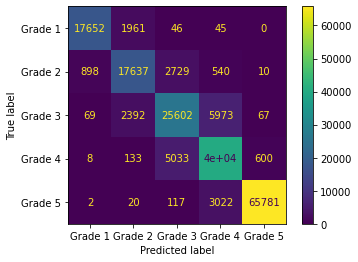

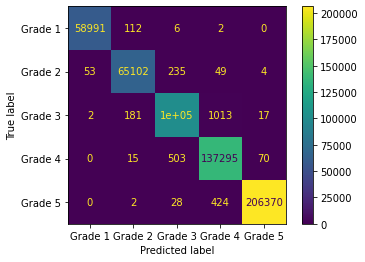

In [73]:
# for test data
# variables
evaluated_model = forest
XTest = X_test_imp
XTrain = X_train_imp
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,y_test)
showConfusionMatrix(evaluated_model, XTest,y_test)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,y_train)
showConfusionMatrix(evaluated_model, XTrain, y_train)

<BarContainer object of 48 artists>

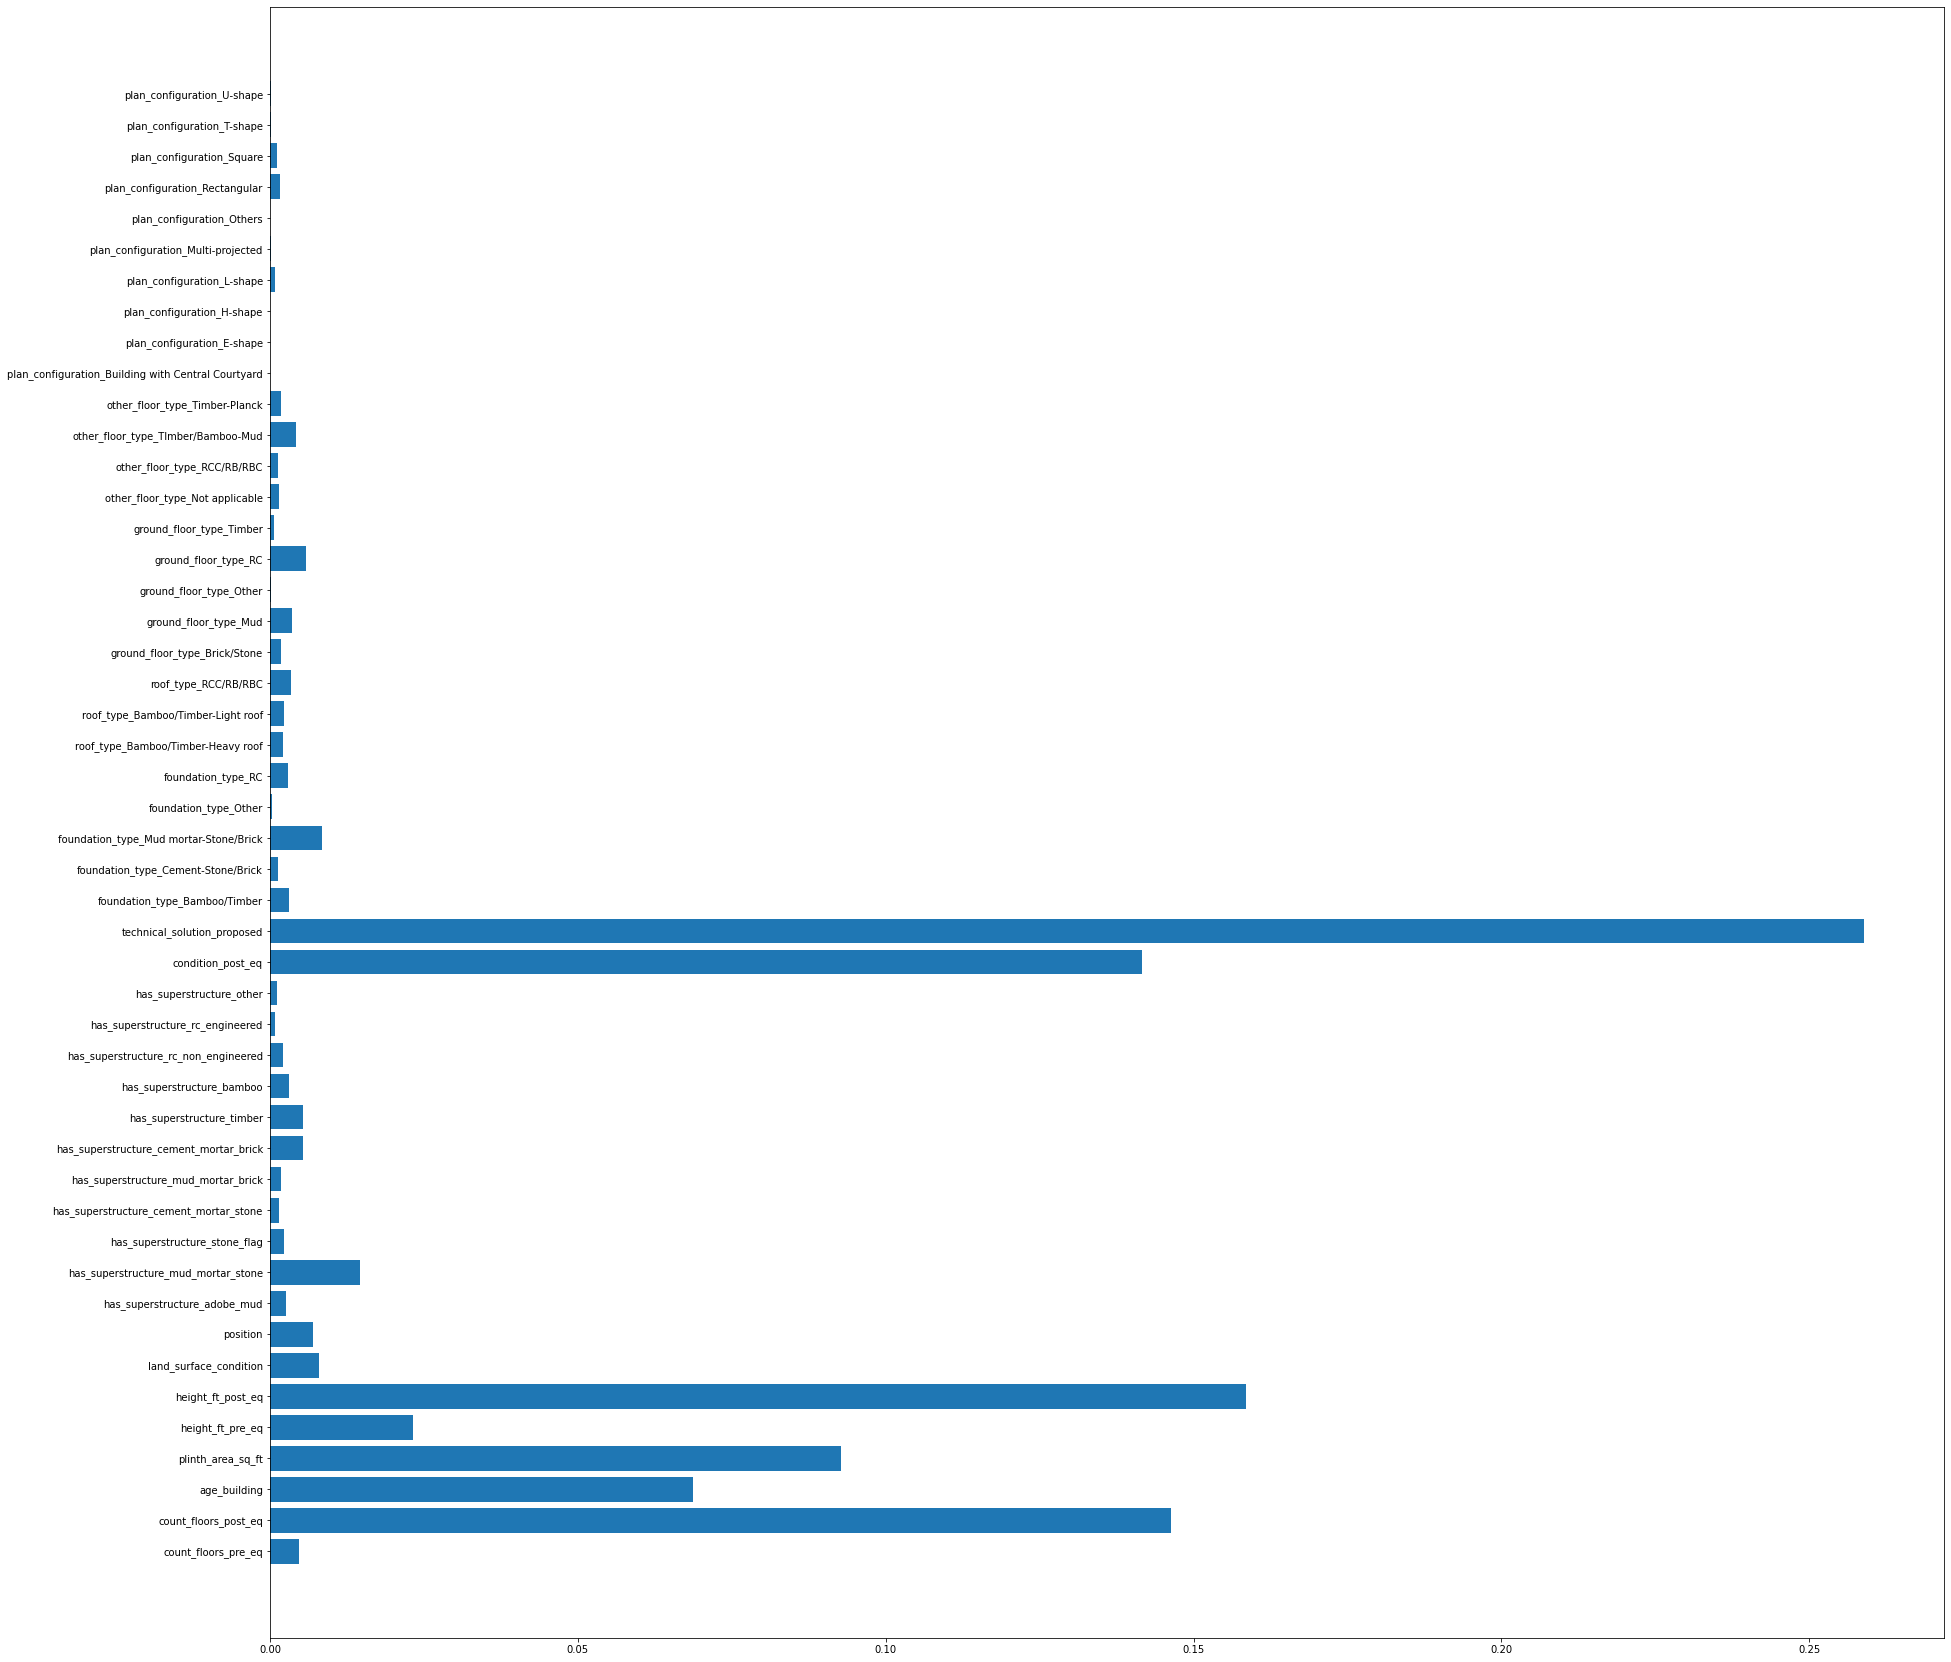

In [74]:
feature_importances = forest.feature_importances_
plt.figure(figsize=(30,30))
plt.barh(X_train_imp.columns,feature_importances)

Hyperparameter Tuning

Hyperparameters to test

In [ ]:
ESTIMATORS = [50,100,200,300,500,700,900,1000]
RANDOM_STATE = 42
MAX_FEATURES = ['auto','sqrt']
MAX_DEPTH = [10,30,50,70,100,130]
MIN_SAMPLES_LEAF = [1,2,4]
MIN_SAMPLES_SPLIT = [2,5,10]
BOOTSTRAP = [True,False]

# Random grid 
random_grid = {
    'n_estimators': ESTIMATORS,
    'max_features': MAX_FEATURES,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF,
    'bootstrap': BOOTSTRAP
}

Using randomizedsearchcv

In [ ]:
# using random grid to search for best hyperparameter 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=RANDOM_STATE)
rf_random.fit(X_train_all,y_train)
rf_random.best_params_

In [ ]:
rf_random.best_params_

In [75]:
# Again training and evaluating the rf model using best hyperparameter 
forest_best = RandomForestClassifier(n_estimators=300,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=100,bootstrap=False,random_state=random_seed)
forest_best.fit(X_train_imp, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_split=10,
                       n_estimators=300, random_state=0)

----- Test Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.8833585270097205
Precision: 0.8873374493150309
Recall: 0.8833585270097205
F1 Score: 0.8844705054280927
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93     19704
           1       0.80      0.82      0.81     21814
           2       0.78      0.76      0.77     34103
           3       0.81      0.90      0.85     45961
           4       1.00      0.95      0.97     68942

    accuracy                           0.88    190524
   macro avg       0.87      0.86      0.87    190524
weighted avg       0.89      0.88      0.88    190524

----- Training Scores --------------
-------- Evaluated Metrics -----------
Accuracy: 0.9513550396276922
Precision: 0.9523840065182546
Recall: 0.9513550396276922
F1 Score: 0.9515997893773346
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0

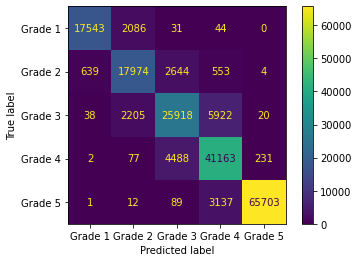

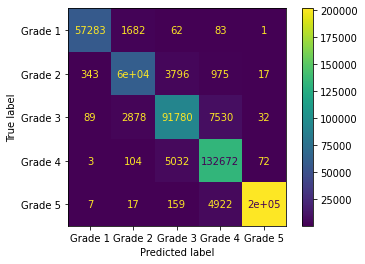

In [76]:
# for test data
# variables
evaluated_model = forest_best
XTest = X_test_imp
XTrain = X_train_imp
print('----- Test Scores --------------')
y_pred_test = evaluated_model.predict(XTest)
showMetrics(y_pred_test,y_test)
showConfusionMatrix(evaluated_model, XTest,y_test)
# for training data 
print('----- Training Scores --------------')
y_pred_train = evaluated_model.predict(XTrain)
showMetrics(y_pred_train,y_train)
showConfusionMatrix(evaluated_model, XTrain, y_train)

<BarContainer object of 48 artists>

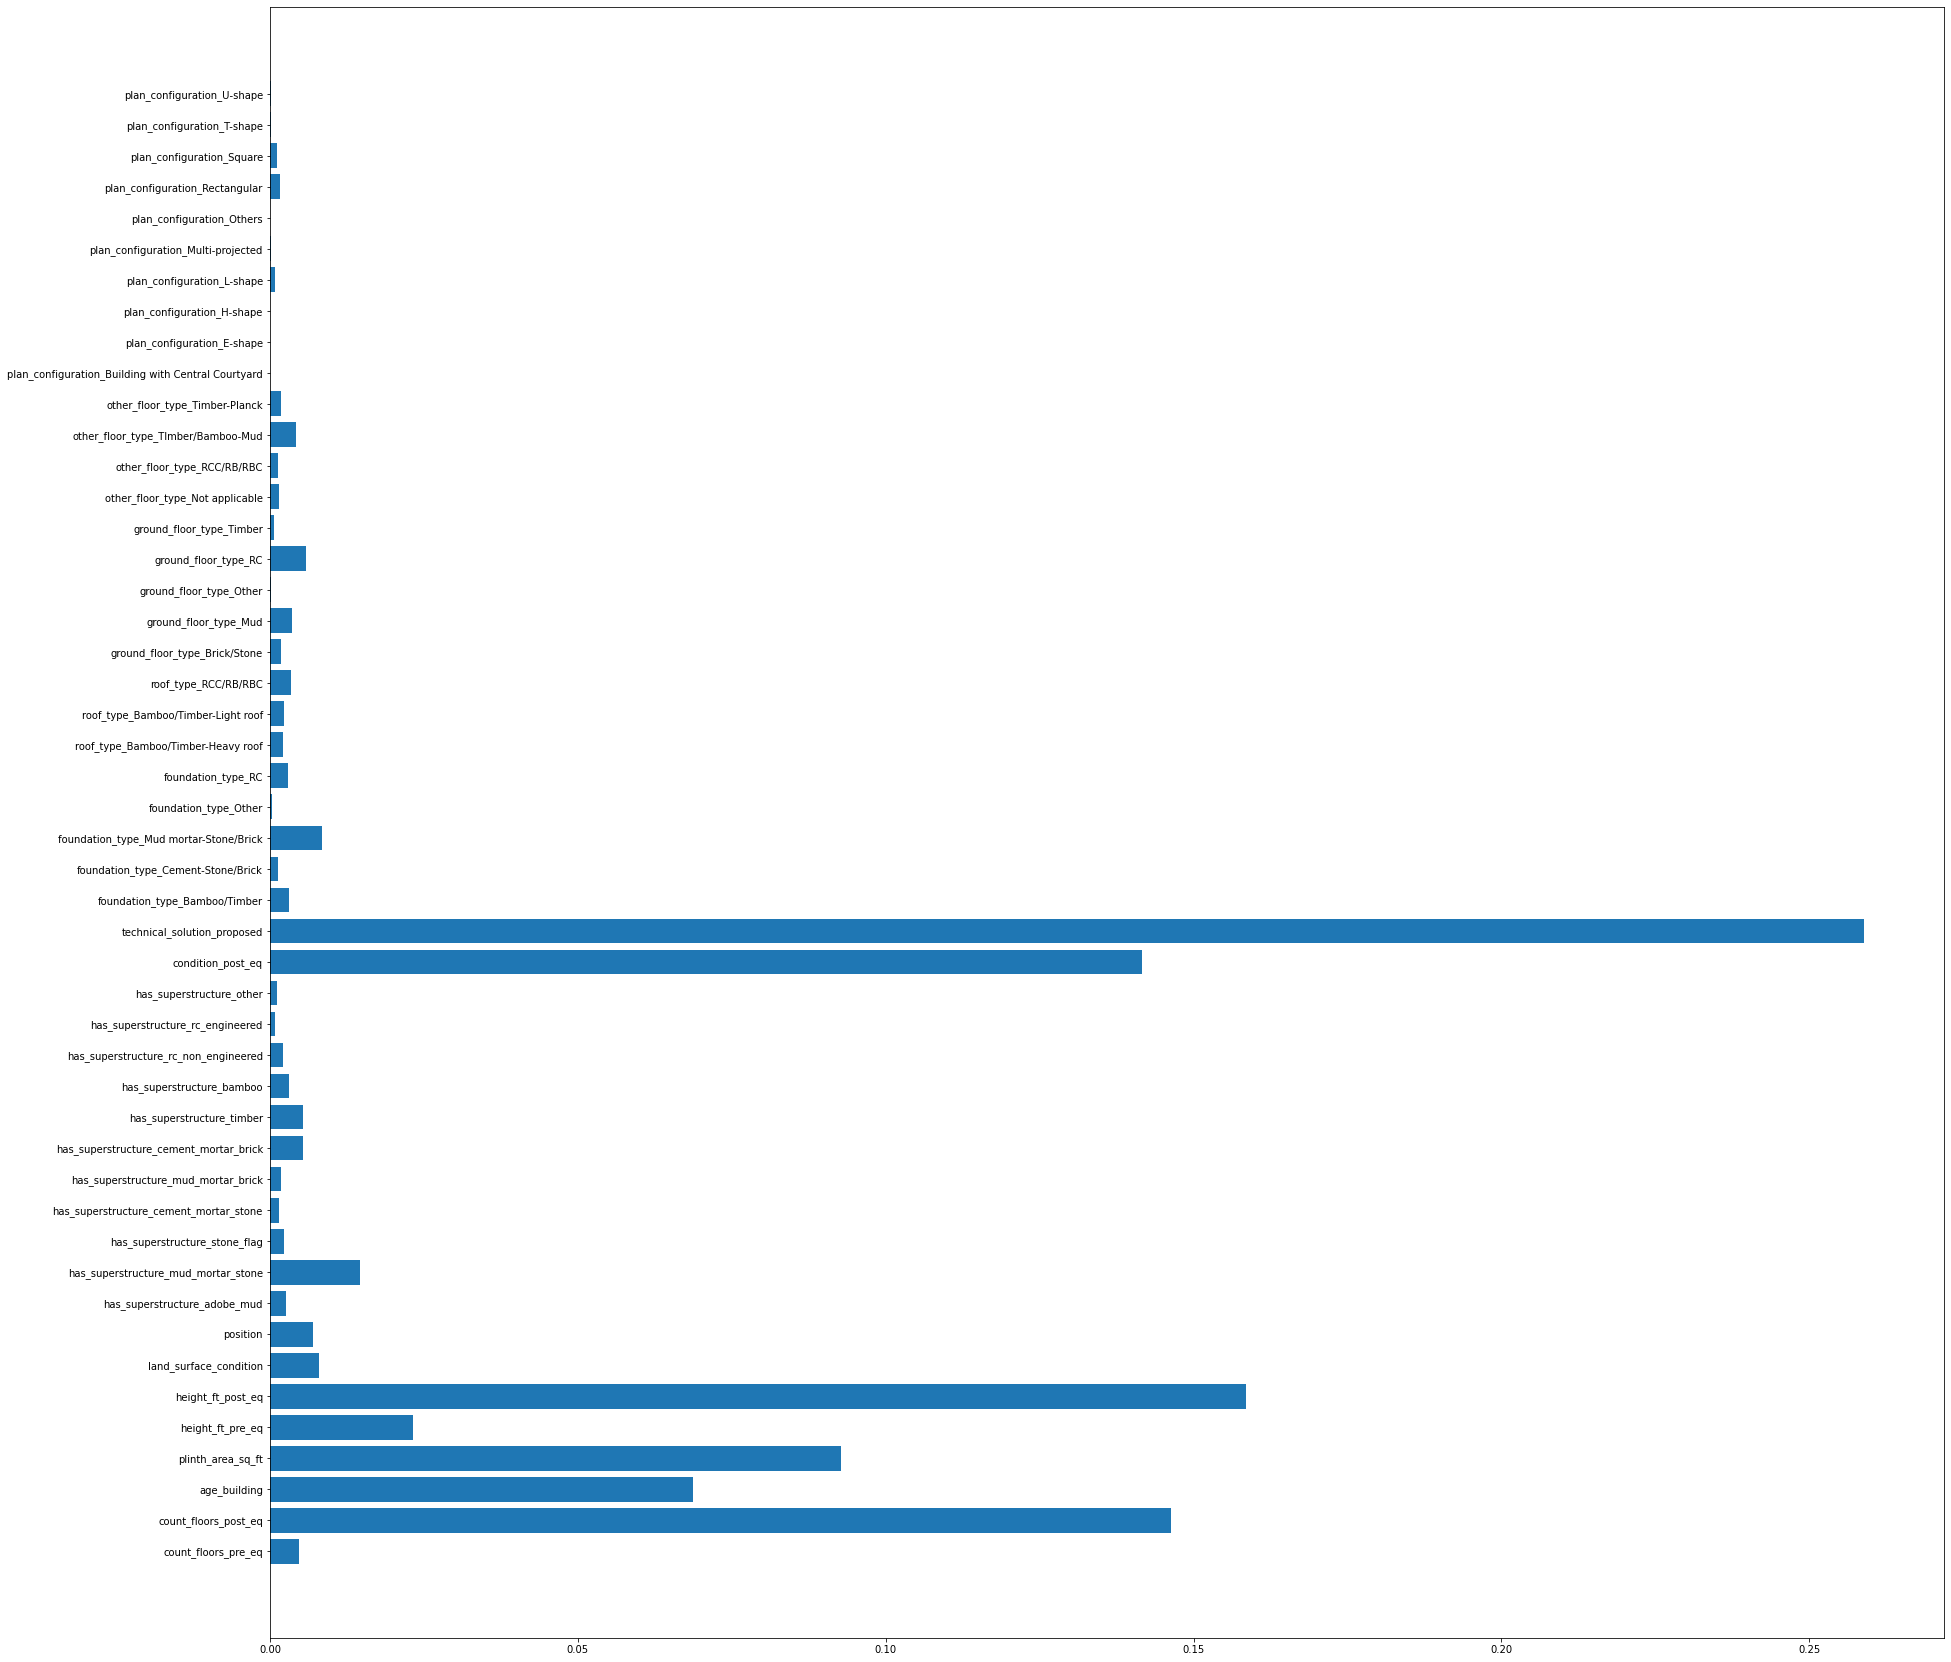

In [77]:
feature_importances = forest.feature_importances_
plt.figure(figsize=(30,30))
plt.barh(X_train_imp.columns,feature_importances)

Saving and loading models

In [18]:
import pickle

In [83]:
# Saving models 
import pickle
pickle.dump(forest,open('rf_model.pkl','wb'))
pickle.dump(forest_best,open('rf_model_tuned.pkl','wb'))

In [20]:
forest_best = pickle.load(open('rf_model_tuned.pkl','rb'))
forest = pickle.load(open('rf_model.pkl','rb'))

In [48]:
X_test_imp['condition_post_eq'].head()

471495    1
342228    3
138301    1
649374    2
214414    1
Name: condition_post_eq, dtype: int32

In [61]:
X_test_imp.head(10)

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Heavy roof,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
471495,3,3,36,265,21,21,0,3,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
342228,4,0,42,420,28,0,0,0,1,0,0,0,1,0,0,0,0,0,0,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
138301,2,2,10,180,18,18,1,3,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
649374,2,2,10,240,12,12,0,3,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
214414,3,3,10,527,18,18,1,3,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
91893,1,0,8,200,9,0,1,3,0,1,0,0,0,0,1,0,0,0,0,4,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
728930,2,0,4,450,14,0,0,3,0,1,0,0,0,0,0,0,0,0,0,5,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
159082,2,2,25,200,15,15,0,3,0,1,0,0,0,0,1,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
419524,2,2,15,440,14,14,1,3,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
131562,2,2,22,210,14,14,0,3,0,1,0,0,0,0,0,0,0,0,0,6,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


Some code for testing

In [ ]:
# loaded_forest = pickle.load(open('rf_model_tuned.pkl','rb'))
col_no = 7
y_pred = forest_best.predict(X_test_imp.iloc[col_no,:].to_numpy().reshape(1,-1))
print(f'Predicted: {damage_grades[y_pred[0]]}')
print(f'Actual: {damage_grades[y_test.to_numpy()[col_no]]}')

Testing using dummy data from web

In [107]:
input_data = {
    'count_floors_pre_eq' : 2,
    'count_floors_post_eq' : 2,
    'age_building' : 25,
    'plinth_area_sq_ft' : 200,
    'height_ft_pre_eq' : 15,
    'height_ft_post_eq' : 15,  
    'land_surface_condition' : 'Flat',
    'position' : 'Not attached',
    'has_superstructure' : ['mud_mortar_stone','timber'],
    'condition_post_eq' : 'Damage-Not used',
    'technical_solution_proposed' : 'Reconstruction',
    'foundation_type' : 'Mud mortar-Stone/Brick',
    'roof_type' : 'Bamboo/Timber-Heavy roof',
    'ground_floor_type' : 'Mud',
    'other_floor_type' : 'TImber/Bamboo-Mud',
    'plan_configuration' : 'Rectangular'    
}


Preparing the dummy data from web

In [112]:
df_web = pd.Series(input_data)
df_web

count_floors_pre_eq                                     2
count_floors_post_eq                                    2
age_building                                           25
plinth_area_sq_ft                                     200
height_ft_pre_eq                                       15
height_ft_post_eq                                      15
land_surface_condition                               Flat
position                                     Not attached
has_superstructure             [mud_mortar_stone, timber]
condition_post_eq                         Damage-Not used
technical_solution_proposed                Reconstruction
foundation_type                    Mud mortar-Stone/Brick
roof_type                        Bamboo/Timber-Heavy roof
ground_floor_type                                     Mud
other_floor_type                        TImber/Bamboo-Mud
plan_configuration                            Rectangular
dtype: object

In [113]:

# label encoding for web variable
df_web['land_surface_condition'] = land_surface_conditions.index(df_web['land_surface_condition'])
df_web['position'] = positions.index(df_web['position'])
df_web['condition_post_eq'] = conditions_post_eq.index(df_web['condition_post_eq'])
df_web['technical_solution_proposed'] = technical_solutions_proposed.index(df_web['technical_solution_proposed'])

df_web

count_floors_pre_eq                                     2
count_floors_post_eq                                    2
age_building                                           25
plinth_area_sq_ft                                     200
height_ft_pre_eq                                       15
height_ft_post_eq                                      15
land_surface_condition                                  0
position                                                3
has_superstructure             [mud_mortar_stone, timber]
condition_post_eq                                       1
technical_solution_proposed                             3
foundation_type                    Mud mortar-Stone/Brick
roof_type                        Bamboo/Timber-Heavy roof
ground_floor_type                                     Mud
other_floor_type                        TImber/Bamboo-Mud
plan_configuration                            Rectangular
dtype: object

In [114]:
# One hot encoding for web variable 
# has_superstructure, foundation_type, roof_type, ground_floor_type, other_floor_type, plan_configuration
# * superstructure
superstructures = ['adobe_mud','mud_mortar_stone','stone_flag','cement_mortar_stone','mud_mortar_brick','cement_mortar_brick','timber','bamboo','rc_non_engineered','rc_engineered','other']
for superstructure in superstructures:
    for input_superstructure in input_data['has_superstructure']:
        key = f'has_superstructure_{superstructure}'
        if key in df_web.keys():
            if df_web[f'has_superstructure_{superstructure}'] != 1:
                df_web[f'has_superstructure_{superstructure}'] = 1 if input_superstructure == superstructure else 0
        else:
            df_web[f'has_superstructure_{superstructure}'] = 1 if input_superstructure == superstructure else 0

# * foundation_type
for foundation_type in nominal_categories['foundation_types']:
    df_web[f'foundation_type_{foundation_type}'] = 1 if input_data['foundation_type'] == foundation_type else 0

# * roof_type
for roof_type in nominal_categories['roof_types']:
    df_web[f'roof_type_{roof_type}'] = 1 if input_data['roof_type'] == roof_type else 0

# * ground_floor_type
for ground_floor_type in nominal_categories['ground_floor_types']:
    df_web[f'ground_floor_type_{ground_floor_type}'] = 1 if input_data['ground_floor_type'] == ground_floor_type else 0

# * other_floor_type 
for other_floor_type in nominal_categories['other_floor_types']:
    df_web[f'other_floor_type_{other_floor_type}'] = 1 if input_data['other_floor_type'] == other_floor_type else 0

# * plan_configuration
for plan_configuration in nominal_categories['plan_configurations']:
    df_web[f'plan_configuration_{plan_configuration}'] = 1 if input_data['plan_configuration'] == plan_configuration else 0
df_web

count_floors_pre_eq                                                            2
count_floors_post_eq                                                           2
age_building                                                                  25
plinth_area_sq_ft                                                            200
height_ft_pre_eq                                                              15
height_ft_post_eq                                                             15
land_surface_condition                                                         0
position                                                                       3
has_superstructure                                    [mud_mortar_stone, timber]
condition_post_eq                                                              1
technical_solution_proposed                                                    3
foundation_type                                           Mud mortar-Stone/Brick
roof_type                   

In [115]:
# removing unwanted cols 
cols_to_remove = ['has_superstructure', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'plan_configuration']
df_test_web = df_web.drop(cols_to_remove)
df_test_web

count_floors_pre_eq                                     2
count_floors_post_eq                                    2
age_building                                           25
plinth_area_sq_ft                                     200
height_ft_pre_eq                                       15
height_ft_post_eq                                      15
land_surface_condition                                  0
position                                                3
condition_post_eq                                       1
technical_solution_proposed                             3
has_superstructure_adobe_mud                            0
has_superstructure_mud_mortar_stone                     1
has_superstructure_stone_flag                           0
has_superstructure_cement_mortar_stone                  0
has_superstructure_mud_mortar_brick                     0
has_superstructure_cement_mortar_brick                  0
has_superstructure_timber                               1
has_superstruc

In [116]:
df_test_web = df_test_web.to_frame().transpose()
df_test_web

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,position,condition_post_eq,technical_solution_proposed,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_type_Other,foundation_type_Mud mortar-Stone/Brick,foundation_type_Cement-Stone/Brick,foundation_type_Bamboo/Timber,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_Bamboo/Timber-Heavy roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Brick/Stone,ground_floor_type_RC,ground_floor_type_Timber,ground_floor_type_Other,other_floor_type_Not applicable,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,other_floor_type_RCC/RB/RBC,plan_configuration_Rectangular,plan_configuration_L-shape,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_Multi-projected,plan_configuration_H-shape,plan_configuration_U-shape,plan_configuration_Others,plan_configuration_E-shape,plan_configuration_Building with Central Courtyard
0,2,2,25,200,15,15,0,3,1,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [117]:
df_test_web.to_numpy()

array([[2, 2, 25, 200, 15, 15, 0, 3, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=object)

In [91]:
X_test_imp.iloc[col_no,:].to_numpy()

array([  4,   0,  42, 420,  28,   0,   0,   0,   1,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   3,   3,   0,   0,   1,   0,   0,
         0,   1,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0], dtype=int64)

In [149]:
reordered_cols = X_test_imp.iloc[7,:].index.to_list()
df_test_web = df_test_web.reindex(columns=reordered_cols)
df_test_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 48 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   count_floors_pre_eq                                 1 non-null      object
 1   count_floors_post_eq                                1 non-null      object
 2   age_building                                        1 non-null      object
 3   plinth_area_sq_ft                                   1 non-null      object
 4   height_ft_pre_eq                                    1 non-null      object
 5   height_ft_post_eq                                   1 non-null      object
 6   land_surface_condition                              1 non-null      object
 7   position                                            1 non-null      object
 8   has_superstructure_adobe_mud                        1 non-null      object
 9   has_superstruc

In [150]:
X_test_imp.iloc[col_no,:].to_numpy().reshape(1,-1) == df_test_web.to_numpy()

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

Predicting using loaded model

In [151]:
y_pred = forest_best.predict(df_test_web.to_numpy())
print(damage_grades[y_pred[0]])
print(damage_grades[y_test.to_numpy()[7]])

Grade 4
Grade 4


d:\Programming\Python\.aivenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [99]:
# loaded_forest = pickle.load(open('rf_model_tuned.pkl','rb'))
col_no = 2
y_pred = forest_best.predict(X_test_imp.iloc[col_no,:].to_numpy().reshape(1,-1))
print(damage_grades[y_pred[0]])
print(damage_grades[y_test.to_numpy()[col_no]])

Grade 2
Grade 3


d:\Programming\Python\.aivenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
